In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# transactions

## read datasets, clean them and join datasets

In [198]:
pd.read_csv('Transactions.csv').isna().sum()

UserID           0
Date             0
Time             0
Paid Amount      0
ChannelID      204
dtype: int64

204 transaction do not have channel_Id. The channel number is a parameter that relates only to question 7 and the analysis section. So only in these sections we will delete records with null for this parameter.

In [199]:
len(pd.read_csv('Transactions.csv'))-len(pd.read_csv('Transactions.csv').drop_duplicates())

0

we do not have duplicate row in dataset of transactions.

In [200]:
tr = pd.read_csv('Transactions.csv')
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


In [201]:
pd.read_csv('Channels.csv', encoding='latin1').isna().sum()

ChannelID      0
ChannelName    0
dtype: int64

In [202]:
ch = pd.read_csv('Channels.csv', encoding='latin1')
ch.head()

,ChannelID,ChannelName
0,1,Antlia
1,2,Ara
2,3,Aries
3,4,Auriga
4,5,Boötes


## last 3 month daily transaction count and amount

In [203]:
last_month = str(tr['Date'].max())[4:6]
last_year = str(tr['Date'].max())[0:4]

tr['Date_year'] = [int(str(i)[0:4]) for i in tr['Date']]
tr['Date_month'] = [int(str(i)[4:6]) for i in tr['Date']]
tr['Date_day'] = [int(str(i)[6:]) for i in tr['Date']]

res = tr[(tr['Date_month'] >= int(last_month)-2) & (tr['Date_year'] == int(last_year))].groupby(
    ['Date_year', 'Date_month','Date_day']).agg({'UserID':'count', 'Paid Amount': 'sum'}).reset_index().rename(
        columns={'UserID':'Transaction Count', 'Paid Amount':'Sum of Paid Amounts'})

res.head()

,Date_year,Date_month,Date_day,Transaction Count,Sum of Paid Amounts
0,1398,10,1,125,88480450
1,1398,10,2,241,197577900
2,1398,10,3,198,135747950
3,1398,10,4,273,207937550
4,1398,10,5,401,302773730


In [204]:
!pip install persiantools

In [205]:
import plotly.graph_objects as go
from persiantools.jdatetime import JalaliDate

days = [JalaliDate(res.iloc[i]['Date_year'], res.iloc[i]['Date_month'],
                   res.iloc[i]['Date_day']).to_gregorian() for i in range(len(res))]
fig = go.Figure()
fig.add_trace(go.Scatter(x=days, y=res['Transaction Count'],
                    mode='lines+markers',
                    name='Transactions Count'))

fig.update_xaxes(calendar='jalali')
fig.update_xaxes(
    dtick="D1",
    tickformat="%d %b\n%Y")

fig.update_layout(
    title="Daily transactions Count in last 3 month",
    xaxis_title="Date",
    yaxis_title="Transactions Count",
    width=1850, height=600
)

fig.show()

- The last three months are related to day, bahman and esfand of 1398.
As can be seen in the daily transactions count plot in this period, we have an overall upward trend until mid-bahman and a downward trend until late esfand.

- In general, most of the number of transactions is related to the first half of bahman.

- The number of transactions in bahman was more than or equal to the maximum of the other two months. This means that more purchases have been made this month than in the other two months.

- Each month we have an increasing trend at the beginning and a decreasing trend at the end. The reason for this can be the time of receiving people's salaries. At the beginning of the month, people gradually receive salaries and transactions increase. But most people do not have rights until the end of the month and their pockets are empty at the end of the month.

- The reason for more transactions in Bahman can be Eid night purchases.
We see that the traffic is high in Bahman and there is also this issue in early esfand. As we go to the end of esfand, the number of transactions decreases. This may be because most people have done their Eid shopping and only the last minute people are left.

- In esfand, the peak period of transactions is less than two months. The reason is that they have made the majority of Eid purchases and their cash balance has run out. They have almost already spent their esfand salaries. That is why the length of the courier is short. The desire to buy has decreased. In Bahman, almost all of us have a courier. We have the maximum length of the transaction peak.

- Another important point is the arrival of Covid 19 in esfand. This can be the reason for the declining trend in a large part of Esfand. As we move forward from the beginning of esfand, the number of transactions has decreased. The reason for this can be the increase in people's fear of this disease and their absence from society. To examine this issue, the trend of transactions in this month should be compared with the same month in previous years. Eid shopping is always done this month and we have a peak this month that is close to the previous month. It is true that transactions become less frequent near Eid, because most people go shopping and go on vacation. But this year we have a peak with very short length and low height. Most of the month we have a decrease in the number of transactions. This seems to be different from previous years, and the reason is Covid.

In [206]:
import plotly.graph_objects as go
from persiantools.jdatetime import JalaliDate

days = [JalaliDate(res.iloc[i]['Date_year'], res.iloc[i]['Date_month'],
                   res.iloc[i]['Date_day']).to_gregorian() for i in range(len(res))]
fig = go.Figure()
fig.add_trace(go.Scatter(x=days, y=res['Sum of Paid Amounts'],
                    mode='lines+markers',
                    name='Sum of Paid Amounts'))

fig.update_xaxes(calendar='jalali')
fig.update_xaxes(
    dtick="D1",
    tickformat="%d %b\n%Y")

fig.update_layout(
    title="Daily Sum of Paid Amounts in last 3 month",
    xaxis_title="Date",
    yaxis_title="Sum of Paid Amounts",
    width=1850, height=600
)

fig.show()

- The amount of money paid in transactions has a similar trend to the number of transactions in this period.

- This roughly equal trend of the two graphs shows that the amount of money traded is fairly distributed. This means that the number of transactions with very little money and a lot of money is low. All transactions have money equal to the average transaction money. The reason for this conclusion is that if we had a lot of differences, the trend of money spent in general could be different from the number of transactions. Of course, this is a hypothesis, we have to prove it with data. The stated case is a possible case.

- Transaction currencies have a probabilistic distribution. Each day's transactions are a sample with a number equal to the number of transactions that day. This sampling is performed using this distribution. As can be seen, the total amount of transactions per day is a constant coefficient of the number of transactions. For this reason, the process of the two plots is similar, and only the numbers on the y-axis are different for plots. This shows that the average transaction money is almost equal every day. This happens when random samples of different sizes have the same average. This means that we have a relatively thin peak on the average distribution. Too much and too little money has very little potential for transactions.




## hourly transaction count and amount in last 48 hour

In [207]:
tr = pd.read_csv('Transactions.csv')
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


In [208]:
def complete_time(last_time):
  return ''.join(['0' for i in range(6-len(last_time))])+last_time

In [209]:
last_day = str(tr['Date'].max())[6:]
last_month = str(tr['Date'].max())[4:6]
last_year = str(tr['Date'].max())[0:4]

last_time = str(int(tr[tr['Date']==tr['Date'].max()]['Time'].max()))
last_time = complete_time(last_time)

last_hour = last_time[:2]

tr['Date_year'] = [int(str(i)[0:4]) for i in tr['Date']]
tr['Date_month'] = [int(str(i)[4:6]) for i in tr['Date']]
tr['Date_day'] = [int(str(i)[6:]) for i in tr['Date']]

tr['Time_hour'] = [int(complete_time(str(i))[:2]) for i in tr['Time']]

res = tr[(tr['Date_year'] == int(last_year)) &
         (tr['Date_month'] == int(last_month)) &
         (tr['Date_day'] >= int(last_day)-1)].groupby(['Date_year', 'Date_month', 'Date_day','Time_hour']).agg(
    {'UserID':'count', 'Paid Amount': 'sum'}
  ).reset_index().rename(columns={'UserID':'Transaction Count', 'Paid Amount':'Sum of Paid Amounts'})

res.head()

,Date_year,Date_month,Date_day,Time_hour,Transaction Count,Sum of Paid Amounts
0,1398,12,28,0,7,6630000
1,1398,12,28,1,5,4404500
2,1398,12,28,2,1,460000
3,1398,12,28,4,1,730000
4,1398,12,28,5,1,660000


In [210]:
import plotly.graph_objects as go
from persiantools.jdatetime import JalaliDateTime

days = [JalaliDateTime(res.iloc[i]['Date_year'], res.iloc[i]['Date_month'],
        res.iloc[i]['Date_day'], int(res.iloc[i]['Time_hour']) ,0,0).to_gregorian() for i in range(len(res))]
fig = go.Figure()
fig.add_trace(go.Scatter(x=days, y=res['Transaction Count'],
                    mode='lines+markers',
                    name='Transactions Count'))

fig.update_xaxes(calendar='jalali')
fig.update_xaxes(
    tickformat="%H:%M\n%d %b")

fig.update_layout(
    title="Hourly transactions Count in last 2 day",
    xaxis_title="Date and Time",
    yaxis_title="Transactions Count",
    width=900, height=400
)

fig.show()

- The last two days are related to the last two days of 1398. As can be seen, every day from about 12 pm to about 2 pm we have a decreasing trend in the number of transactions. From two to six in the morning, the number of transactions is almost constant. In this interval we have the least number of transactions. From 7 am to about 12 noon, we have a general increase in transactions. From 12 noon to about 11 pm, the number of transactions is almost high. We have some peaks at this time around 6 o'clock in the afternoon. Of course, 28th esfand and 29th esfand are not very comparable. The 29th day is the last day of the year and a holiday, and it is a few days before the holiday. The market almost does not have a normal buying and selling trend on this day.

- Due to fewer purchases at the end of esfand, the number of transactions at different hours of this day has decreased from the previous day. Due to the special circumstances of this day, the non-work of many jobs, we have an almost decreasing trend after 12 noon. It could also be due to the approaching time of year change.

- At 1 to 6 o'clock in the morning, people are asleep. Few jobs work. As a result, the number of transactions during this period is almost zero. Also, banks are usually not available for transactions within hours of this time. The banks are preparing for the next day at this time.

- The working day starts at 7 o'clock and for this reason we have the trend of increasing transactions. Gradually businesses start working and the number of transactions increases. We have a peak at 12 noon, which could be due to the arrival of lunch time. After this time, the number of transactions remains high. From 3 to 6 pm we have a high number of transactions and we also have peaks. This could be due to the end of office hours and the closure of some businesses. They make transactions in the last hours to prepare for tomorrow. People want to pay at the last minute. We also approach dinner time around 6 p.m. We have an increase in transactions around 6 am and before that creates a small peak for morning jobs and breakfast suppliers. A number of transactions until 8 am, to get people to work and offices. From 6 pm to 12 pm, the number of transactions is high and we have a peak near the end of the day. Again, these are for people who want to make a transaction at the last minute of the day and prepare for tomorrow.

In [211]:
import plotly.graph_objects as go
from persiantools.jdatetime import JalaliDateTime

days = [JalaliDateTime(res.iloc[i]['Date_year'], res.iloc[i]['Date_month'],
        res.iloc[i]['Date_day'], int(res.iloc[i]['Time_hour']) ,0,0).to_gregorian() for i in range(len(res))]
fig = go.Figure()
fig.add_trace(go.Scatter(x=days, y=res['Sum of Paid Amounts'],
                    mode='lines+markers',
                    name='Sum of Paid Amounts'))

fig.update_xaxes(calendar='jalali')
fig.update_xaxes(
    tickformat="%H:%M\n%d %b")

fig.update_layout(
    title="Hourly Sum of Paid Amounts in last 2 day",
    xaxis_title="Date and Time",
    yaxis_title="Sum of Paid Amounts",
    width=900, height=400
)

fig.show()

As can be seen, the two plots have the same trend and only the axis values are different for them. Like the charts of the last three months, we see that hourly transaction money is a constant factor of the number of transactions. As before, this shows that the amount of money of most transactions is equal to the average, and very expensive transactions and very cheap transactions are very rare.

## monthly customers count

In [212]:
tr = pd.read_csv('Transactions.csv')
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


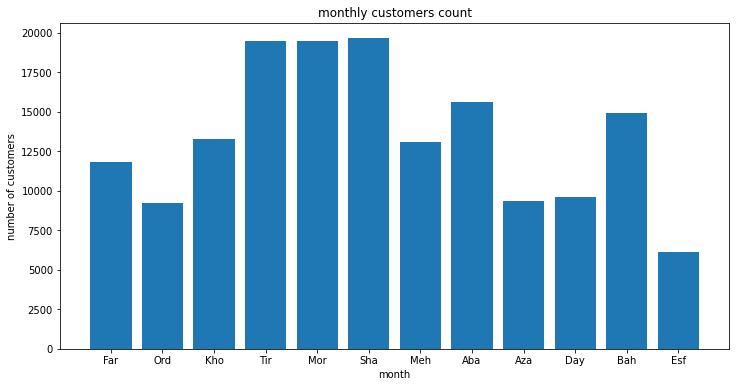

In [213]:
tr['Date_month'] = [int(str(i)[4:6]) for i in tr['Date']]
res = tr.groupby('Date_month')['UserID'].nunique()

month_name = {1:'Far', 2:'Ord', 3:'Kho', 4:'Tir', 5:'Mor', 6:'Sha', 7:'Meh', 8:'Aba',
              9:'Aza', 10:'Day', 11:'Bah', 12:'Esf'}

plt.figure(figsize=(12,6))
plt.bar([month_name[i] for i in list(res.keys())], res.values)
plt.xlabel('month')
plt.ylabel('number of customers')
plt.title('monthly customers count')
plt.show()

- As can be seen, the number of customers in the three months of summer is higher than other months. After these months, the number of customers is more in aban. After that, the number of customers is more in bahman and then in khordad and mehr. farvardin is next. Other months have almost the same number of customers and less than the said months.

- In the summer, we have the most customers, which could be due to the closure of school and college classrooms. Before the beginning of summer, the number of customers will increase from Khordar. This shows the process of preparing for summer in customers. Also, schools in khordad have almost no classes. The high number of customers can have different reasons and should be statistically examined in different years according to the characteristics of customers. After the summer, we have a decreasing trend and we will reach the month of mehr. Purchases in late summer and mehr and early aban can be related to the opening of schools. Students each seem to be a customer whose trend in attending transactions is based on the academic year. In November, we have a peak in the number of customers.

- The reason for aban peak can be shopping for winter and preparing for this season. Like buying the right winter clothes. In winter, the number of customers reaches the lowest level, except in bahman. In Bahman, people go to celebrate Eid and shop for it. That is why the number of customers has been high in this month. Another important point is the presence of Covid 19 in esfand. This issue can reduce the number of customers in esfand. Because usually Eid shopping is still done in esfand.

- An important factor in the number of customers is their ability to be present in the market and circulating in the store. For this reason, the number of customers has increased during the summer and student holidays. Also in winter and as the weather cools, we see that the number of customers has decreased. Of course, taking exams in the middle of winter is also important in this regard. In esffand 1398, we encountered Covid. This has led to a sharp decline in customers. The reason is the fear of being in the society and the restrictions of being in the society. In the spring and this season's exams, we also see a decrease in customers. In farvardin, we have a relatively high number of customers and the reason is the closure in early farvardin.

## Weekly income

In [214]:
tr = pd.read_csv('Transactions.csv')
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


In [215]:
def find_week_date(date_jal):
  if date_jal.day >= 1 and date_jal.day <= 7:
    return JalaliDate(date_jal.year, date_jal.month, 7).to_gregorian() 
  elif date_jal.day >= 8 and date_jal.day <= 14:
    return JalaliDate(date_jal.year, date_jal.month, 14).to_gregorian() 
  elif date_jal.day >= 15 and date_jal.day <= 21:
    return JalaliDate(date_jal.year, date_jal.month, 21).to_gregorian() 
  else:
    return JalaliDate(date_jal.year, date_jal.month, 28).to_gregorian() 

In [216]:
def convert_date(date_str):
  year, month, day = str(date_str)[0:4], str(date_str)[4:6], str(date_str)[6:]
  year_int, month_int, day_int = int(year), int(month), int(day) 
  return JalaliDate(year_int, month_int, day_int)

tr['Date'] = tr['Date'].apply(convert_date)
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,1398-03-24,210341,623100,1.0
1,88681,1398-01-04,10617,420000,2.0
2,3617,1398-01-13,223052,390000,3.0
3,111638,1398-03-05,171649,3375000,4.0
4,2216,1398-03-15,222211,660000,5.0


In [217]:
tr['week'] = tr['Date'].apply(find_week_date)
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID,week
0,37087,1398-03-24,210341,623100,1.0,2019-06-18
1,88681,1398-01-04,10617,420000,2.0,2019-03-27
2,3617,1398-01-13,223052,390000,3.0,2019-04-03
3,111638,1398-03-05,171649,3375000,4.0,2019-05-28
4,2216,1398-03-15,222211,660000,5.0,2019-06-11


In [218]:
res = tr.groupby('week').sum()['Paid Amount']

In [219]:
res = res.multiply(0.1)

In [220]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=res.keys(), y=res.values,
                    mode='lines+markers',
                    name='week income'))

fig.update_xaxes(calendar='jalali')
fig.update_xaxes(
    dtick="M1",
    tickformat="%d %b\n%Y")

fig.update_layout(
    title="Weekly income",
    xaxis_title="Date",
    yaxis_title="week income",
    width=900, height=400
)

fig.show()

- As can be seen, the plot trend is almost identical to the customer count plot. In the months when the number of customers was low, the income was low. The months that the customer was more, the income was more. Of course, in some weeks we have had peak in income. In the last weeks of the summer months we have peaks and we earn more from the surrounding weeks. Because we charge a percentage of the transaction money, this could indicate more transactions in this week or more transaction money in this week.

- In the first week of farvardin, income was high and then income was low. The reason for the high income in the first week was more vacations and transactions or more expensive transactions. In the previous diagrams we saw that the transaction money is almost equal to the average and the transactions are almost the same in value. So more transactions are more likely to be done in peaks. In khordad, the trend of earning income has increased again. The reason is the increase in transactions and the welcome of summer. In summer, the total revenue is higher than other seasons, which is not commensurate with the number of transactions and customers in this season. The peaks show that most of the monthly transactions of this season were in the last weeks of the month.

- In aban and bahman, after the summer, we have an increase in income, which is proportional to the increase in transactions and customers in these for winter and Eid purchases. Most of the last week's revenue is clearly visible in the summer, and there is no such trend in other months. In the other months, the income is almost evenly divided between the weeks.

- In farvadin, the revenue trend has been declining for weeks. In khordad, we had an increasing trend. In mehr, we also had a decreasing trend, but the trend of changes in the slope was milder than the two months. In dey, we had a slow increase trend, which is due to the welcome of Eid shopping. In the other months, the income is evenly divided between the weeks.

## Retention Rate

In [221]:
tr = pd.read_csv('Transactions.csv')
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


In [222]:
tr['Date_year'] = [int(str(i)[0:4]) for i in tr['Date']]
tr['Date_month'] = [int(str(i)[4:6]) for i in tr['Date']]
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID,Date_year,Date_month
0,37087,13980324,210341,623100,1.0,1398,3
1,88681,13980104,10617,420000,2.0,1398,1
2,3617,13980113,223052,390000,3.0,1398,1
3,111638,13980305,171649,3375000,4.0,1398,3
4,2216,13980315,222211,660000,5.0,1398,3


In [223]:
per_month_users = tr.groupby(['Date_year','Date_month'])
per_month_users_keys = per_month_users.groups.keys()

perv = None
res = []
for i, key in enumerate(per_month_users_keys):
  if i == 0:
    perv = set(per_month_users.get_group(key)['UserID'].tolist())
  else:
    curr = set(per_month_users.get_group(key)['UserID'].tolist())
    c = 0
    for j in perv:
      if j in curr:
        c +=1
    res.append(c/len(perv))
    perv = set(per_month_users.get_group(key)['UserID'].tolist())

In [224]:
import plotly.graph_objects as go
from persiantools.jdatetime import JalaliDate

days = [JalaliDate(i[0], i[1], 1).to_gregorian() for i in list(per_month_users_keys)[1:]]
fig = go.Figure()
fig.add_trace(go.Scatter(x=days, y=res,
                    mode='lines+markers',
                    name='Retention Rate'))

fig.update_xaxes(calendar='jalali')
fig.update_xaxes(
    dtick="M1",
    tickformat="%d %b\n%Y")

fig.update_layout(
    title="Monthly Retention Rate",
    xaxis_title="Date",
    yaxis_title="Retention Rate",
    width=900, height=400
)

fig.show()

- Here, the amount of each month shows what percentage of the previous month's customers bought again and returned. As it turns out, the return ratio was low in ordebehesht. The reason is the decrease in customers from farvadin to ordibehesht. This decrease in the rate of return shows that a number of customers did not buy last month, and the departure of these customers has had an effect on reducing the number of customers. In khordad, this ratio increases. We know that the number of customers has increased between these two months. This indicates that a proportion of customers from the previous month did not buy this month and a proportion did. The proportion of returning people has been higher than the previous month. In other words, a good number of the increased customers in khordad were from Ordibehesht.

- In tir, the return rate has increased again, while between tir and khordad, we have had an increase in the number of customers. This means that more customers than the previous month have returned compared to the previous month. In addition to previous customers, we have had a significant number of new customers. In mordad, compared to tir, the number of customers is constant, but the return rate has decreased. This means that we have a larger proportion of new customers than the previous month. This is because of the low return, we have kept the number of customers constant with the new customer. In shahrivar, the return rate is almost constant compared to the previous month, and we did not have much difference in the ratio of new and old customers because the number of customers in two months is equal.

- In mehr, the number of customers has decreased since shahrivar. The rate of return has also decreased. The decrease in previous customers has been reflected in the decrease in total customers. In aban, the rate of return has increased again. We reached the point of return near shahrivar. Between mehre and aban, the total number of customers has also increased. This means that a larger proportion of customers have returned since the month before and have helped increase the total number of customers. Something like Mehr has happened in Azar.

- In dey and bahman, the return ratio has increased each time. The increase in return in bahman compared to dey was accompanied by an increase in the total customer in bahman. Increased customer return compared to the previous month has helped to increase Bahman customer. In azar and dey, the total number of customers was almost the same. This means that increasing the dey return ratio has helped keep the total number of customers constant. The number of new customers added was very low compared to the previous month.

- In esfand, the rate of return is almost zero, which is in line with the fact that the number of customers in esfand is much less than in Bahman. The departure of a large number of old customers and the lack of new customers has caused a sharp decrease in the number of customers in esfand. The reason for the decrease in the return rate in esfand could be the arrival of Covid 19. After esfand, the lowest return rate is for ordibehsht. This shows that in farvardin we have many new customers who will not return next month. People who probably buy in the farvardin holidays once a year. From khordad to mordad, we had a high rate of return. Even in shahrivar, this issue was almost established. However, after sharivar, the rate of return was lower overall and we only had peak places. One is in aban and one in bahman.



## Cohort Analysis

In [225]:
tr = pd.read_csv('Transactions.csv')
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


In [226]:
tr['Date'] = tr['Date'].apply(convert_date)

In [227]:
def to_gregorian_tr(d):
  return d.to_gregorian()

tr['Date'] = tr['Date'].apply(to_gregorian_tr)
tr['Date'] = pd.to_datetime(tr['Date'])
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,2019-06-14,210341,623100,1.0
1,88681,2019-03-24,10617,420000,2.0
2,3617,2019-04-02,223052,390000,3.0
3,111638,2019-05-26,171649,3375000,4.0
4,2216,2019-06-05,222211,660000,5.0


In [228]:
tr['order_month'] = tr['Date'].dt.to_period('M')
tr['cohort'] = tr.groupby('UserID')['Date'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [229]:
from operator import attrgetter

df_cohort = tr.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('UserID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [230]:
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2019-03,2019-03,6200,0
1,2019-03,2019-04,717,1
2,2019-03,2019-05,425,2
3,2019-03,2019-06,562,3
4,2019-03,2019-07,509,4


In [231]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [232]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

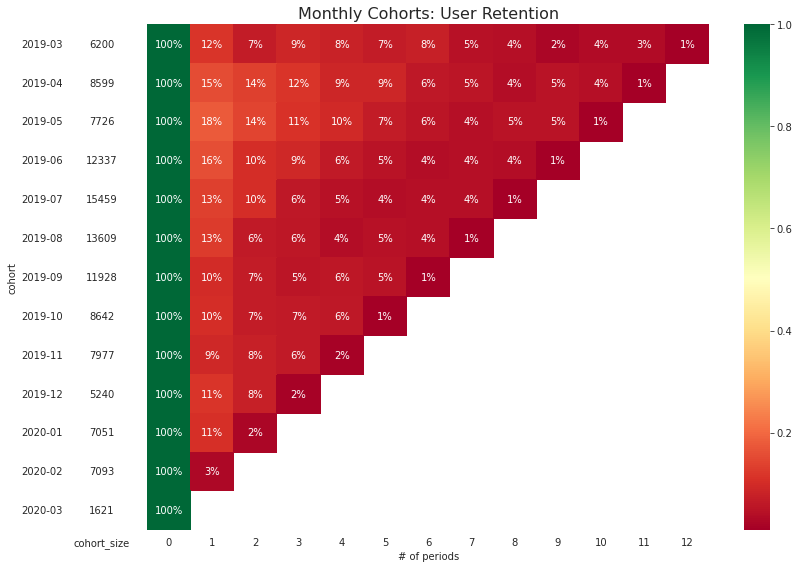

In [233]:
import matplotlib.colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

- Here, each matrix entry represents the percentage, which is the percentage of people who entered the row date and still traded after a few months that the column number is specifying this periods.

- As can be seen, after one month after the arrival of people in different months, more than 80% of the incoming people have no more transactions. In each row we see the percentage of incoming people present in each month after arrival. In some rows there was a declining trend throughout. In some rows, we had a decreasing trend at first, but then there was an increasing trend in some months. This increase indicates that a number of people entered in a particular month, re-traded a few months later, and their return has helped to increase the trend.

- The biggest decrease in incoming people in bahman 1398 has occurred after one month. In Esfand, only 3% of people entering Bahman remain. We also see in the other rows that we end up with almost zero percent. This means that from the entries of the months before esfand, almost no one is left in esfand 1398. That's why we saw the number of customers this month almost zero. In ordebesht, khordad, tir and mordad, we see that more than two months after the entry, the percentage of incoming people in transactions has been over 10%. The period for these inputs is related to khordad and summer, when we had the largest number of customers. This indicates that the inputs of this period have a relatively long shelf life and have contributed to the high number of summer customers. After the summer, incoming people were in the transactions for almost just one month after entering more than 10%. After that, their presence has decreased and a decreasing trend has been found.

- Of course, there are months in the fall and winter when the entries reappear a few months later, creating a short-term upward trend. These increasing trends have led to an increase in customers in months such as aban and bahman.

## channels with most transactions

### Non-first transactions

In [234]:
tr = pd.read_csv('Transactions.csv')
tr.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


remove records with null channel id.

In [235]:
tr = tr.dropna()

In [236]:
ch = pd.read_csv('Channels.csv', encoding='latin1')
ch.head()

,ChannelID,ChannelName
0,1,Antlia
1,2,Ara
2,3,Aries
3,4,Auriga
4,5,Boötes


join channel and transaction dataframes

In [237]:
tr_ch = tr.set_index('ChannelID').join(ch.set_index('ChannelID')).reset_index()
tr_ch.head()

,ChannelID,UserID,Date,Time,Paid Amount,ChannelName
0,1.0,37087,13980324,210341,623100,Antlia
1,1.0,33768,13980320,122410,1372000,Antlia
2,1.0,68294,13980219,125220,680000,Antlia
3,1.0,94189,13980206,212431,306000,Antlia
4,1.0,34876,13980124,83230,95000,Antlia


In [238]:
tr_ch_first_date = tr_ch.groupby('UserID').min().loc[:,['Date']] # 113410  users
tr_ch_first_date.head()

,Date
UserID,
1,13980311
2,13980422
3,13980302
4,13980912
5,13980108


In [239]:
tr_ch_first = tr_ch.set_index('UserID').join(tr_ch_first_date, rsuffix='_first').reset_index()
tr_ch_first = tr_ch_first[tr_ch_first['Date']==tr_ch_first['Date_first']].groupby(
    'UserID').min().loc[:,['Date', 'Time']]

In [240]:
tr_ch_first.head()

,Date,Time
UserID,,
1,13980311,102206
2,13980422,1505
3,13980302,211529
4,13980912,230900
5,13980108,103145


In [241]:
tr_ch = tr_ch.set_index('UserID').join(tr_ch_first, rsuffix='_first').reset_index()
tr_ch.head()

,UserID,ChannelID,Date,Time,Paid Amount,ChannelName,Date_first,Time_first
0,1,4.0,13980311,102206,1000000,Auriga,13980311,102206
1,1,4.0,13980711,120936,1674500,Auriga,13980311,102206
2,1,4.0,13980704,114435,1649000,Auriga,13980311,102206
3,1,4.0,13980513,114758,1700000,Auriga,13980311,102206
4,2,3.0,13980422,1505,4920000,Aries,13980422,1505


In [242]:
res = tr_ch[(tr_ch['Date'] != tr_ch['Date_first']) | (tr_ch['Time'] != tr_ch['Time_first'])]
res.head()

,UserID,ChannelID,Date,Time,Paid Amount,ChannelName,Date_first,Time_first
1,1,4.0,13980711,120936,1674500,Auriga,13980311,102206
2,1,4.0,13980704,114435,1649000,Auriga,13980311,102206
3,1,4.0,13980513,114758,1700000,Auriga,13980311,102206
10,7,10.0,13981009,115354,806650,Chamaeleon,13980531,112537
12,8,15.0,13980822,211541,837250,Eridanus,13980814,233301


In [243]:
channel_user_dist = res.groupby('ChannelID').count().loc[:,'UserID'].sort_values(ascending=False)
channel_user_dist.head(10)

ChannelID
5.0     23095
4.0     11738
10.0     6661
7.0      6334
3.0      5016
1.0      4531
15.0     4089
21.0     4046
14.0     3775
6.0      3004
Name: UserID, dtype: int64

In [244]:
channel_user_dist_pro = channel_user_dist.multiply(1/channel_user_dist.sum())
channel_user_dist_pro.head(10)

ChannelID
5.0     0.248200
4.0     0.126147
10.0    0.071585
7.0     0.068071
3.0     0.053907
1.0     0.048694
15.0    0.043944
21.0    0.043482
14.0    0.040570
6.0     0.032284
Name: UserID, dtype: float64

Here is the percentage of transactions performed in the top 10 channels next to the channel number.

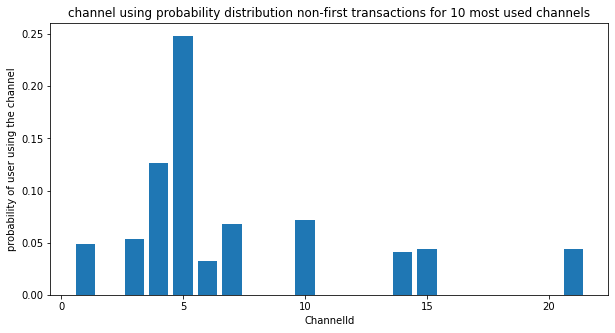

In [245]:
plt.figure(figsize=(10,5))
plt.bar(channel_user_dist_pro.head(10).sort_index().keys(), channel_user_dist_pro.head(10).sort_index().values)
plt.xlabel('ChannelId')
plt.ylabel('probability of user using the channel')
plt.title('channel using probability distribution non-first transactions for 10 most used channels')
plt.show()

The distribution of transactions in the top 10 channels is shown in this plot.

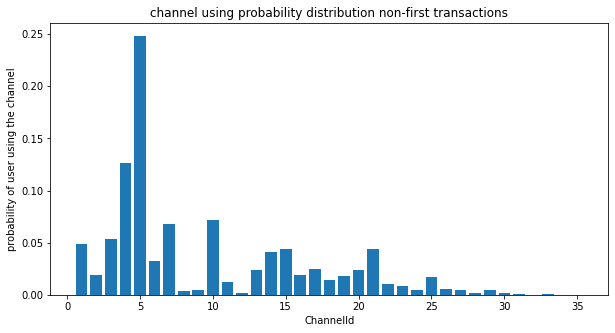

In [246]:
plt.figure(figsize=(10,5))
plt.bar(channel_user_dist_pro.sort_index().keys(), channel_user_dist_pro.sort_index().values)
plt.xlabel('ChannelId')
plt.ylabel('probability of user using the channel')
plt.title('channel using probability distribution non-first transactions')
plt.show()

The distribution of transactions in the channels is shown in this diagram. The general shape of this distribution is very similar to the distribution of the top 10 channels. The extra channels in the second chart do not have a high frequency versus the top 10 channels and play almost a small role. These distributions are for transactions other than the first transactions.

### first transactions

In [247]:
res = tr_ch[(tr_ch['Date'] == tr_ch['Date_first']) & (tr_ch['Time'] == tr_ch['Time_first'])]
res.head()

,UserID,ChannelID,Date,Time,Paid Amount,ChannelName,Date_first,Time_first
0,1,4.0,13980311,102206,1000000,Auriga,13980311,102206
4,2,3.0,13980422,1505,4920000,Aries,13980422,1505
5,3,21.0,13980302,211529,294500,Lynx,13980302,211529
6,4,5.0,13980912,230900,693000,Boötes,13980912,230900
7,5,10.0,13980108,103145,1460000,Chamaeleon,13980108,103145


In [248]:
channel_user_dist = res.groupby('ChannelID').count().loc[:,'UserID'].sort_values(ascending=False)
channel_user_dist.head(10)

ChannelID
5.0     28024
4.0     13843
10.0     8040
7.0      7193
3.0      6692
1.0      5531
15.0     5129
14.0     4774
21.0     4737
6.0      3820
Name: UserID, dtype: int64

In [249]:
channel_user_dist_pro = channel_user_dist.multiply(1/channel_user_dist.sum())
channel_user_dist_pro.head(10)

ChannelID
5.0     0.247103
4.0     0.122062
10.0    0.070893
7.0     0.063425
3.0     0.059007
1.0     0.048770
15.0    0.045225
14.0    0.042095
21.0    0.041769
6.0     0.033683
Name: UserID, dtype: float64

Here is the percentage of transactions performed in the top 10 channels next to the channel number. this datas is about the first transactions. 

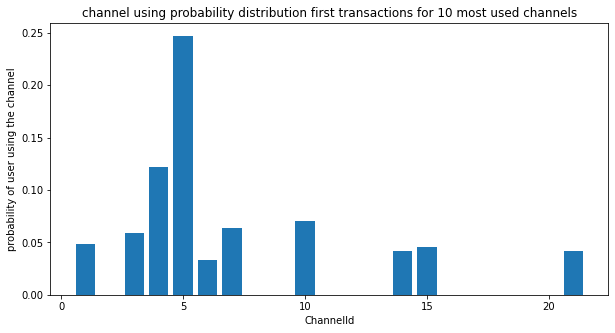

In [250]:
plt.figure(figsize=(10,5))
plt.bar(channel_user_dist_pro.head(10).sort_index().keys(), channel_user_dist_pro.head(10).sort_index().values)
plt.xlabel('ChannelId')
plt.ylabel('probability of user using the channel')
plt.title('channel using probability distribution first transactions for 10 most used channels')
plt.show()

Comparing this result with the result of non-first transactions, the important point is that the top 10 channels are the same and only in the order of the channels, the two channels have different sequences. Channels 21 and 14 have been swapped, one after the other. The frequencies of the channels in the same sequences are very close. Channels with different order in comparison do not differ much in frequency. It can almost be said that the top 10 channels of the first transactions are the same as the non-first transactions. This means that the popular channels in the first transaction continue to be popular. One reason could be that few people have changed their transaction channel.

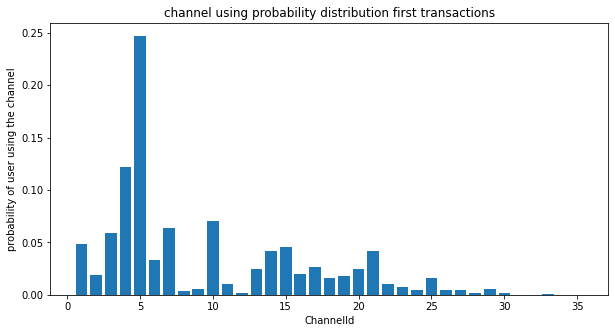

In [251]:
plt.figure(figsize=(10,5))
plt.bar(channel_user_dist_pro.sort_index().keys(), channel_user_dist_pro.sort_index().values)
plt.xlabel('ChannelId')
plt.ylabel('probability of user using the channel')
plt.title('channel using probability distribution first transactions')
plt.show()

Here, as before, the distribution of all channels is given. As can be seen, the distribution of transactions in channels for first transactions is very similar to the distribution of transactions in channels for non-first transactions. All the cases in comparison of the distribution of the top 10 channels can be seen here as well.

### The transfer matrix between the first and second transaction channels

In [252]:
res_first_transaction = tr_ch[(tr_ch['Date'] == tr_ch['Date_first']) & (tr_ch['Time'] == tr_ch['Time_first'])]
res_first_transaction.head()

,UserID,ChannelID,Date,Time,Paid Amount,ChannelName,Date_first,Time_first
0,1,4.0,13980311,102206,1000000,Auriga,13980311,102206
4,2,3.0,13980422,1505,4920000,Aries,13980422,1505
5,3,21.0,13980302,211529,294500,Lynx,13980302,211529
6,4,5.0,13980912,230900,693000,Boötes,13980912,230900
7,5,10.0,13980108,103145,1460000,Chamaeleon,13980108,103145


In [253]:
without_first = tr_ch[(tr_ch['Date'] != tr_ch['Date_first']) | (tr_ch['Time'] != tr_ch['Time_first'])]
without_first.head()

,UserID,ChannelID,Date,Time,Paid Amount,ChannelName,Date_first,Time_first
1,1,4.0,13980711,120936,1674500,Auriga,13980311,102206
2,1,4.0,13980704,114435,1649000,Auriga,13980311,102206
3,1,4.0,13980513,114758,1700000,Auriga,13980311,102206
10,7,10.0,13981009,115354,806650,Chamaeleon,13980531,112537
12,8,15.0,13980822,211541,837250,Eridanus,13980814,233301


In [254]:
tr_ch_second_date = without_first.groupby('UserID').min().loc[:,['Date']] # 113410  users
tr_ch_second_date.head()

,Date
UserID,
1,13980513
7,13981009
8,13980818
9,13980730
11,13980623


In [255]:
tr_ch_second = without_first.set_index('UserID').join(tr_ch_second_date, rsuffix='_second').reset_index()
tr_ch_second = tr_ch_second[tr_ch_second['Date']==tr_ch_second['Date_second']].groupby(
    'UserID').min().loc[:,['Date', 'Time']]

In [256]:
tr_ch_second.head()

,Date,Time
UserID,,
1,13980513,114758
7,13981009,115354
8,13980818,200340
9,13980730,183851
11,13980623,153707


In [257]:
tr_ch = tr_ch.set_index('UserID').join(tr_ch_second, rsuffix='_second').reset_index()
tr_ch.head(10)

,UserID,ChannelID,Date,Time,Paid Amount,ChannelName,Date_first,Time_first,Date_second,Time_second
0,1,4.0,13980311,102206,1000000,Auriga,13980311,102206,13980513.0,114758.0
1,1,4.0,13980711,120936,1674500,Auriga,13980311,102206,13980513.0,114758.0
2,1,4.0,13980704,114435,1649000,Auriga,13980311,102206,13980513.0,114758.0
3,1,4.0,13980513,114758,1700000,Auriga,13980311,102206,13980513.0,114758.0
4,2,3.0,13980422,1505,4920000,Aries,13980422,1505,NaN,NaN
5,3,21.0,13980302,211529,294500,Lynx,13980302,211529,NaN,NaN
6,4,5.0,13980912,230900,693000,Boötes,13980912,230900,NaN,NaN
7,5,10.0,13980108,103145,1460000,Chamaeleon,13980108,103145,NaN,NaN
8,6,2.0,13980819,95625,310000,Ara,13980819,95625,NaN,NaN
9,7,10.0,13980531,112537,1768000,Chamaeleon,13980531,112537,13981009.0,115354.0


In [258]:
tr_ch = tr_ch.dropna()

In [259]:
first_second = tr_ch[((tr_ch['Date'] == tr_ch['Date_first']) & (tr_ch['Time'] == tr_ch['Time_first'])) |
                     ((tr_ch['Date'] == tr_ch['Date_second']) & (tr_ch['Time'] == tr_ch['Time_second']))]
first_second.head()

,UserID,ChannelID,Date,Time,Paid Amount,ChannelName,Date_first,Time_first,Date_second,Time_second
0,1,4.0,13980311,102206,1000000,Auriga,13980311,102206,13980513.0,114758.0
3,1,4.0,13980513,114758,1700000,Auriga,13980311,102206,13980513.0,114758.0
9,7,10.0,13980531,112537,1768000,Chamaeleon,13980531,112537,13981009.0,115354.0
10,7,10.0,13981009,115354,806650,Chamaeleon,13980531,112537,13981009.0,115354.0
11,8,4.0,13980814,233301,1300500,Auriga,13980814,233301,13980818.0,200340.0


In [260]:
first_second = first_second.sort_values(['UserID', 'Date', 'Time'])
res = [[0 for j in range(len(ch))] for i in range(len(ch))]
s = [0 for i in range(len(ch))]
for i in range(1,len(first_second),2):
  first = first_second.iloc[i-1]['ChannelID']
  second = first_second.iloc[i]['ChannelID']
  res[int(first-1)][int(second-1)] += 1
  s[int(first-1)] += 1

In [261]:
# transfer_matrix = 100*(np.array(res)/s)
transfer_matrix = [[0 for j in range(len(ch))] for i in range(len(ch))]

for i in range(len(ch)):
  for j in range(len(ch)):
    transfer_matrix[i][j] = res[i][j] / s[i]
    transfer_matrix[i][j] *= 100 

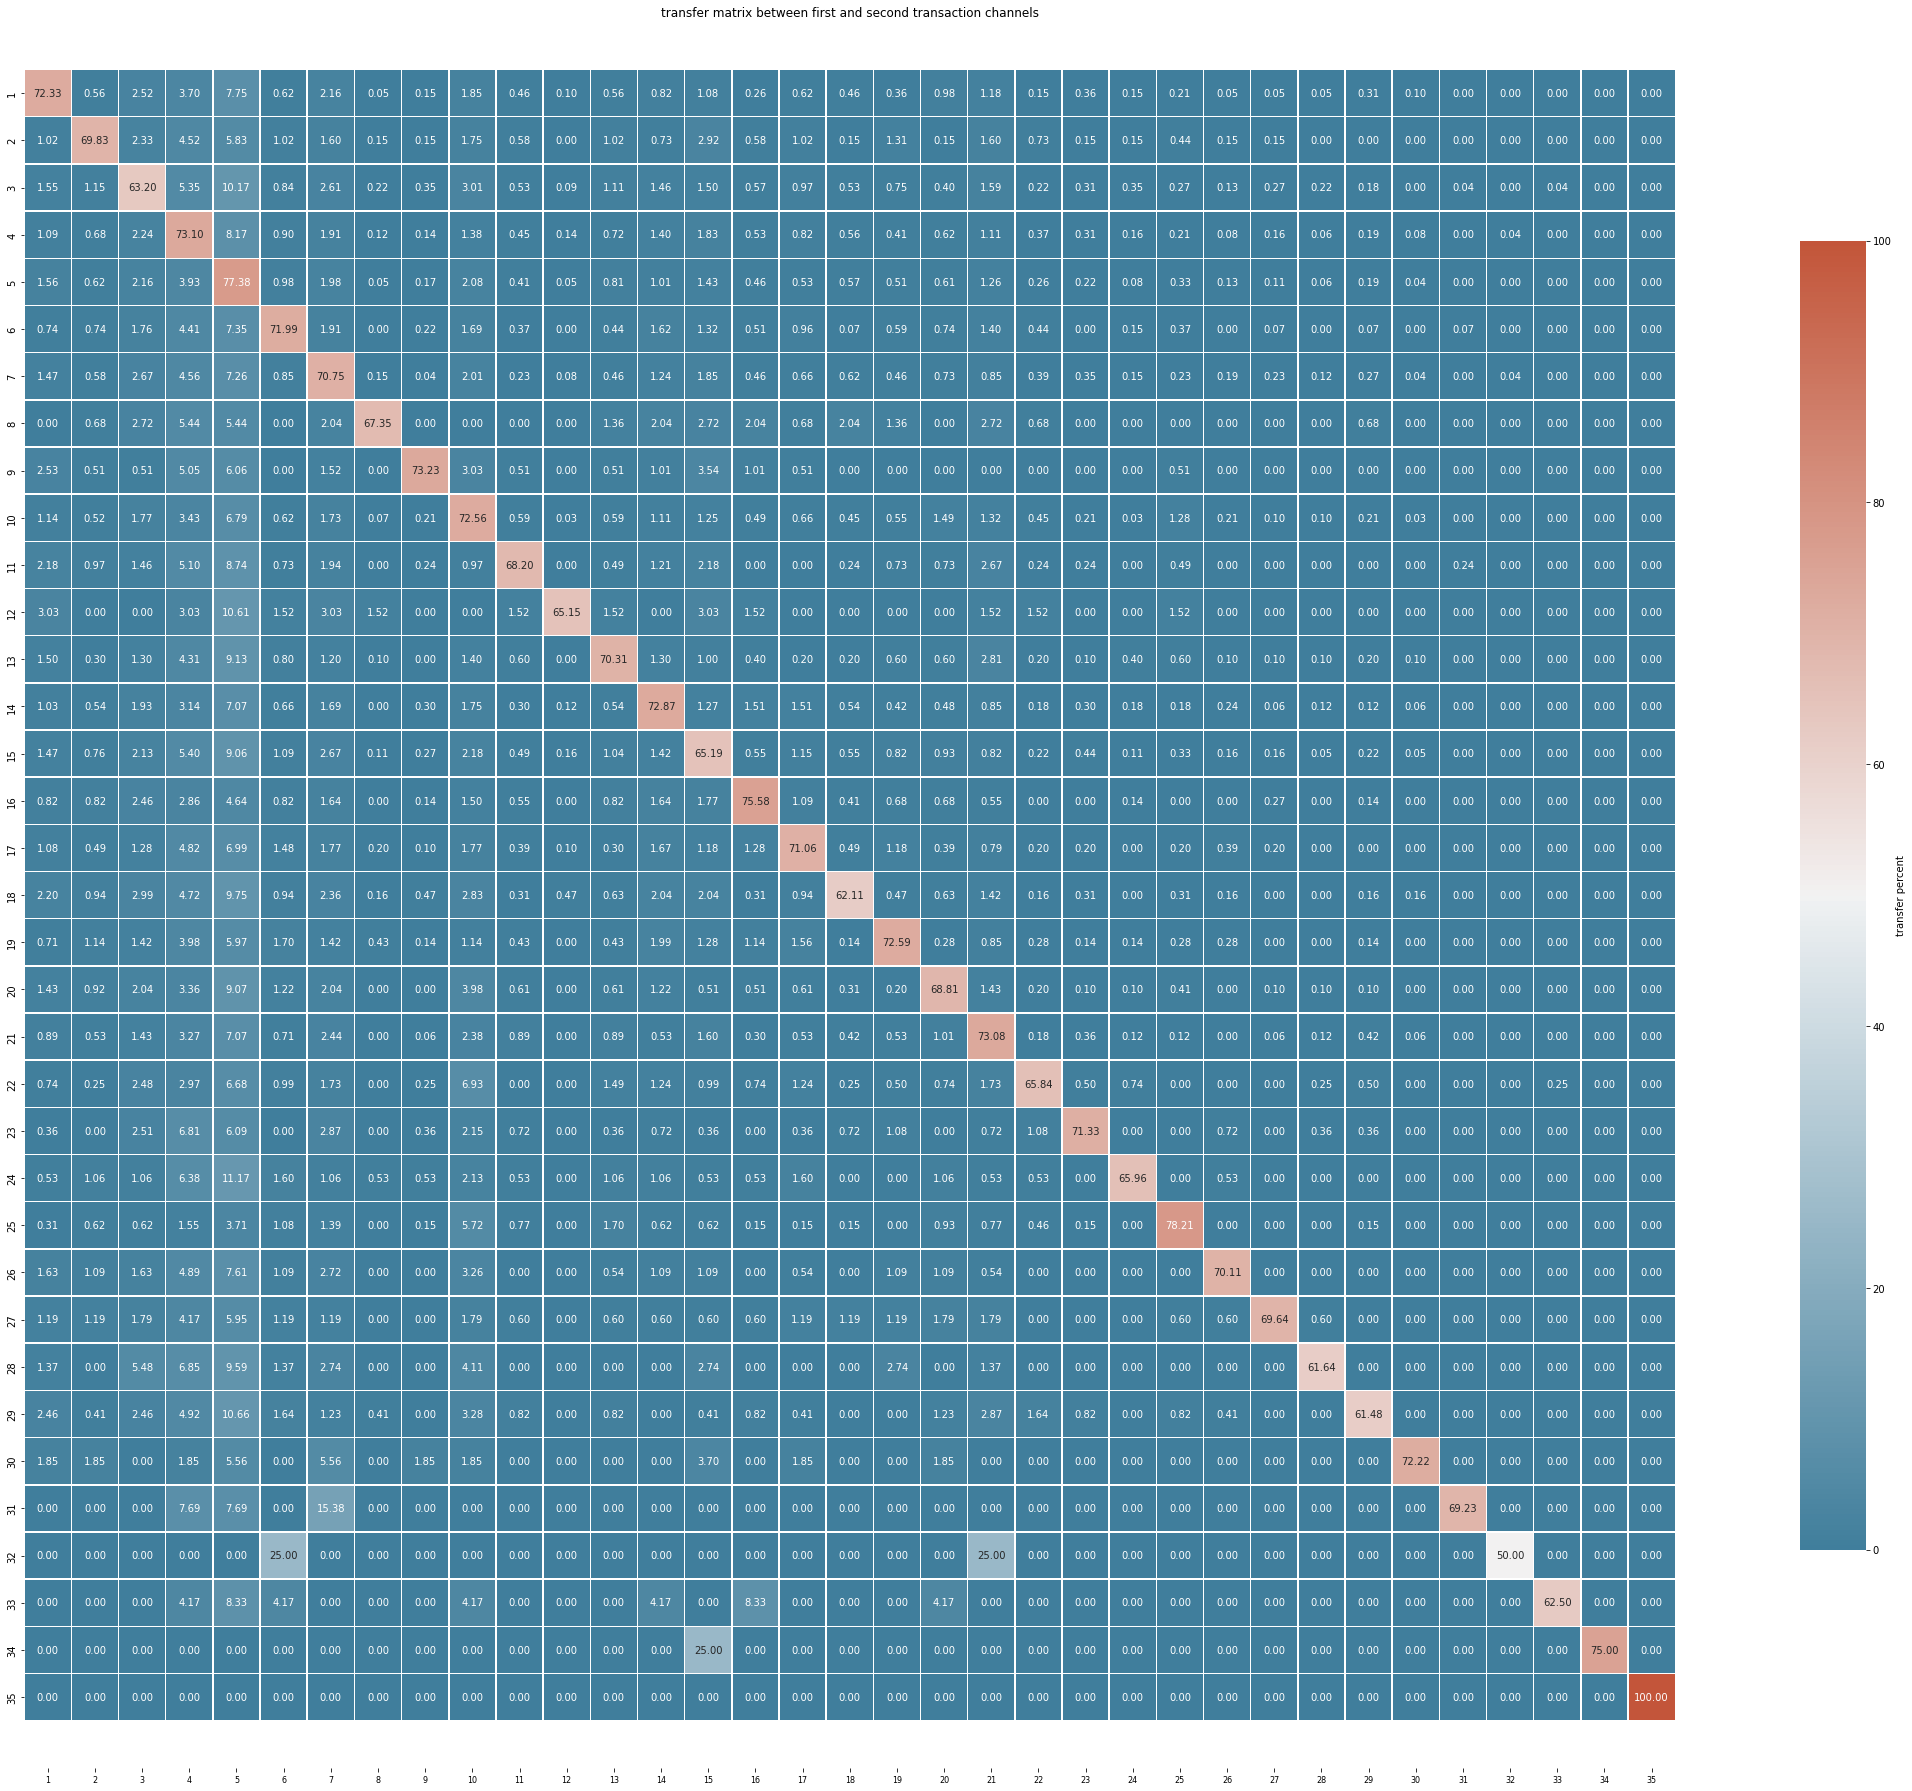

In [262]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(35, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

axis_labels = list(range(1,len(ch)+1))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(transfer_matrix, 
            # mask=mask, 
            cmap=cmap, 
            vmax= np.max(transfer_matrix), 
            vmin = np.min(transfer_matrix),
            center= (np.max(transfer_matrix)+np.min(transfer_matrix))/2,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.2f', 
            annot_kws={'size': 10},
            cbar_kws={"shrink": .75, 'label': 'transfer percent'},
            xticklabels=axis_labels, yticklabels=axis_labels)

plt.title('transfer matrix between first and second transaction channels')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 8)
ax.set_ylim(len(transfer_matrix)+1, -1)
# plt.savefig('corrTax.png', dpi = 600)

plt.show()

- As can be seen, most matrix cells are dark blue, which means that the percentage is very close to zero. Matrix cells close to white and red are mostly located on the main diameter. This means that most people have used the same first channel in the first transaction for the second transaction.

- In each row, the largest number is on the original diameter of the matrix. That is, with a high probability, the first transaction channel is used for the second transaction. For channels other than the top 10, the total row numbers are smaller than the top channel row. This is due to the fact that the probability of using these channels in the first transaction is low (Here we looked at cells other than the original diameter). They are also used in non-first transactions with low probability (The columns of the superior channels are close to white and red, and the columns of the non-superior channels are almost dark blue. This indicates that in the second transaction, the top channels are more popular and the non-top channels are less popular. This is why the column numbers of non-superior channels are low. That is, they are less likely to be used in the second transaction.). The top 10 channels that are popular in both first and non-first transactions have rows and columns with larger numbers.

- Around the diameter, matrix cells are seen with numbers. Indicates how likely a channel is to switch to another channel in the second transaction. Matrix cells corresponding to two of the top 10 channels have larger numbers. This means that if the second transaction channel is not the same as the first, it is likely that two different transaction channels are out of the top 10 channels. This has helped keep the top 10 channels in the first transaction still popular in non-first transactions.

- If the first channel is not in the top 10, cells of them in the matrix second channel is in the top 10, will have more value in most cases.
That is, non-top 10 channels will most likely become top channels in the second transaction.
This has also helped keep the top 10 in the first transaction popular in non-first transactions.

- To create this matrix, for each user, we obtain the first and second transactions. We add a cell of the matrix corresponding to the first and second channels of the individual to the value of one. In this way, the repetition matrix of the displacements is obtained. Finally, we divide all the numbers by the number of times the first cell channel is used in transactions.

# SSH log

In [67]:
!unzip SSH_new.zip

Archive:  SSH_new.zip
  inflating: SSH.log                 


In [263]:
!head -10 SSH.log

Dec 10 06:55:46 LabSZ sshd[24200]: reverse mapping checking getaddrinfo for username [173.234.31.186] failed - POSSIBLE BREAK-IN ATTEMPT!
Dec 10 06:55:46 LabSZ sshd[24200]: invalid user username from 173.234.31.186
Dec 10 06:55:46 LabSZ sshd[24200]: input_userauth_request: invalid user username [preauth]
Dec 10 06:55:46 LabSZ sshd[24200]: pam_unix(sshd:auth): check pass; user unknown
Dec 10 06:55:46 LabSZ sshd[24200]: pam_unix(sshd:auth): authentication failure; logname= uid=0 euid=0 tty=ssh ruser= rhost=192.168.1.1 
Dec 10 06:55:48 LabSZ sshd[24200]: Failed password for invalid user username from 173.234.31.186 port 38926 ssh2
Dec 10 06:55:48 LabSZ sshd[24200]: Connection closed by 173.234.31.186 [preauth]
Dec 10 07:02:47 LabSZ sshd[24203]: Connection closed by 212.47.254.145 [preauth]
Dec 10 07:07:38 LabSZ sshd[24206]: invalid user username from 52.80.34.196
Dec 10 07:07:38 LabSZ sshd[24206]: input_userauth_request: invalid user username [preauth]


In [264]:
log_dict = {'time':[], 'ssh_id':[], 'event':[]}

with open('SSH.log') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]
    for i in lines:
      log_dict['time'].append(i.split('LabSZ')[0].rstrip())
      ssh = i.split('LabSZ sshd')[1]
      log_dict['ssh_id'].append(int(ssh[1:ssh.find(']')]))
      log_dict['event'].append(ssh[ssh.find(':')+1:].rstrip())

In [265]:
log = pd.DataFrame(log_dict)
log.head()

,time,ssh_id,event
0,Dec 10 06:55:46,24200,reverse mapping checking getaddrinfo for user...
1,Dec 10 06:55:46,24200,invalid user username from 173.234.31.186
2,Dec 10 06:55:46,24200,input_userauth_request: invalid user username...
3,Dec 10 06:55:46,24200,pam_unix(sshd:auth): check pass; user unknown
4,Dec 10 06:55:46,24200,pam_unix(sshd:auth): authentication failure; ...


### convert time to timestamp

In [266]:
from datetime import datetime
import time

res = []
for i in log['time']:
  dt = datetime.strptime(i, '%b %d %H:%M:%S').replace(year=2021)
  res.append(time.mktime(dt.timetuple()))

log['time'] = res

In [267]:
log.isna().sum()

time      0
ssh_id    0
event     0
dtype: int64

In [268]:
len(log)-len(log.drop_duplicates())

0

## convert ip to tag \<IP>

In [269]:
import re
ip_addr_regex = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')

res = []
for i in log['event']:
  res.append(re.sub(ip_addr_regex, '<IP>', i))

log['event'] = res

## convert number to tag \<NUM>

In [270]:
import re
ip_addr_regex = re.compile(r'[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+')

res = []
for i in log['event']:
  res.append(re.sub(ip_addr_regex, '<NUM>', i))

log['event'] = res

## convert named entity to tag
- convert username to \<USER>
- convert URL or IP to \<IP\URL>
- convert event message to \<EVENT>

In [271]:
# import copy

# res = []
# for i in log['event']:
#   t = i.split()
#   if i.find('Accepted password for')>=0:
#     t[t.index('for')+1] = '<USER>'
#   if i.find('Address <IP> maps to')>=0:
#     t[t.index('to')+1] = '<IP/URL>,'
#   if i.find('Bad protocol version identification')>=0:
#     t = re.sub('\'([^\']*)\'', "'<QU>'",i).split()
#   if i.find('reverse mapping checking getaddrinfo for')>=0:
#     temp = copy.deepcopy(t[:t.index('for')+1])
#     temp.extend(['<IP/URL>'])
#     temp.extend(t[t.index('for')+2:])
#     t = temp
#   if i.find('Received disconnect from <IP>: <NUM>:')>=0:
#     temp = copy.deepcopy(t[:t.index('<NUM>:')+1])
#     temp.extend(['<EVENT>'])
#     if i.find('[preauth]')>=0:
#       temp.extend(['[preauth]'])
#     t = temp
#   if i.find('pam_unix(sshd:session): session opened for user')>=0:
#     temp = copy.deepcopy(t[:t.index('user')+1])
#     temp.extend(['<USER>'])
#     if i.find(' by ')>=0:
#       temp.extend(t[t.index('by'):])
#     t = temp
#   if i.find('input_userauth_request: invalid user')>=0 or i.find('pam_unix(sshd:session): session closed for user')>=0:
#     temp = copy.deepcopy(t[:t.index('user')+1])
#     temp.extend(['<USER>'])
#     temp.extend(t[t.index('user')+2:])
#     t = temp
#   if i.find('Disconnecting: Too many authentication failures for')>=0:
#     t[t.index('for')+1] = '<USER>'
#   if i.find('Invalid user')>=0:
#     temp = copy.deepcopy(t[:t.index('user')+1])
#     temp.extend(['<USER>'])
#     temp.extend(t[t.index('from'):])
#     t = temp
#   if i.find('Failed none for invalid user')>=0:
#     temp = copy.deepcopy(t[:t.index('user')+1])
#     temp.extend(['<USER>'])
#     temp.extend(t[t.index('from'):])
#     t = temp
#   if i.find('Server listening on')>=0:
#     temp = copy.deepcopy(t[:t.index('on')+1])
#     temp.extend(['<IP>'])
#     temp.extend(t[t.index('port'):])
#     t = temp
#   if i.find('Failed password for invalid user')>=0:
#     temp = copy.deepcopy(t[:t.index('user')+1])
#     temp.extend(['<USER>'])
#     temp.extend(t[t.index('from'):])
#     t = temp
#   elif i.find('Failed password for')>=0:
#     temp = copy.deepcopy(t[:t.index('for')+1])
#     temp.extend(['<USER>'])
#     temp.extend(t[t.index('from'):])
#     t = temp
#   if i.find('PAM <NUM> more authentication failure')>=0 or i.find('pam_unix(sshd:auth): authentication failure')>=0:
#     temp = []
#     for j in range(len(t)):
#       if t[j].find('rhost=')>=0:
#         temp.append('rhost=<IP>')
#         continue
#       if t[j].find('user=')>=0 and t[j].find('ruser=')<0:
#         temp.append('user=<USER>')
#         continue
#       temp.append(t[j])
#     t = temp
#   res.append(' '.join(t))

# sorted(set(res)), len(sorted(set(res)))

In [272]:
# log['event'] = res

In the new version of Data, these things are observed and there is no need to do this anymore. Below are the unique events and the number of events.

In [273]:
sorted(set(log['event'])), len(sorted(set(log['event'])))

([' Accepted password for username from <IP> port <NUM> ssh<NUM>',
  ' Address <IP> maps to <IP>.magvision.com, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!',
  ' Address <IP> maps to <NUM>-<NUM>-<NUM>-<NUM>-dedicated.multacom.com, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!',
  ' Address <IP> maps to apure.tepuyserver.net, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!',
  ' Address <IP> maps to corporativo.gvt.net.br, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!',
  ' Address <IP> maps to hosted-by.enoctus.com, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!',
  ' Address <IP> maps to localhost, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!',
  ' Address <IP> maps to mail.junlike.com, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!',
  ' Address <IP> maps to mail.trionis.ru, but this does not map back to the addr

## number of events and probability distribution for these events

We have 80 unique events in logs. The probability distribution for these events is given below.

In [274]:
dist = [0 for i in range(len(sorted(set(res))))]
tgs = list(sorted(set(res)))
dist_dict = dict(zip(tgs,dist))

for i in log['event']:
  dist_dict[i] += 1

for i in tgs:
  dist_dict[i] /= len(log['event'])

In [275]:
dist_dict

{' Accepted password for username from <IP> port <NUM> ssh<NUM>': 0.0002778002494096745,
 ' Address <IP> maps to <IP>.magvision.com, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!': 2.442199994810325e-05,
 ' Address <IP> maps to <NUM>-<NUM>-<NUM>-<NUM>-dedicated.multacom.com, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!': 0.0004975982489426038,
 ' Address <IP> maps to apure.tepuyserver.net, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!': 1.5263749967564532e-06,
 ' Address <IP> maps to corporativo.gvt.net.br, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!': 1.5263749967564532e-06,
 ' Address <IP> maps to hosted-by.enoctus.com, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!': 5.342312488647586e-05,
 ' Address <IP> maps to localhost, but this does not map back to the address - POSSIBLE BREAK-IN ATTEMPT!': 1.5263749967564532e-06,
 ' Address <IP> maps to mail.junlike.co

- We have 80 unique events. The distribution of these events is as follows. Below we see the top 10 events in terms of probability of occurrence.

- As can be seen, the most likely events are all related to unsuccessful authentication, incorrect password entry, and many unsuccessful login attempts. We also have an event related to disconnection.

- Most high-probability events are due to unsuccessful authentication and incorrect password entry. This indicates a problem in this regard. The user interface may not be suitable for authentication. Users may have trouble in remembering the password. These many unsuccessful actions can also indicate a cyber attack to log in. For this issue, the timing of actions and the distance between them should be examined.

In [276]:
import operator

sorted(dist_dict.items(), key=operator.itemgetter(1))[-10:]

[(' Failed password for invalid user username from <IP> port <NUM> ssh<NUM>',
  0.030007006061235113),
 (' pam_unix(sshd:auth): check pass; user unknown', 0.030301596435609108),
 (' PAM <NUM> more authentication failures; logname= uid=<NUM> euid=<NUM> tty=ssh ruser= rhost=<IP>  user=username',
  0.05642397813009905),
 (' message repeated <NUM> times: [ Failed password for username from <IP> port <NUM> ssh<NUM>]',
  0.0564255045050958),
 (' Disconnecting: Too many authentication failures for username [preauth]',
  0.05692462912903516),
 (' PAM service(sshd) ignoring max retries; <NUM> > <NUM>',
  0.05794577400186523),
 (' Received disconnect from <IP>: <NUM>: Bye Bye [preauth]',
  0.07111839022387342),
 (' Connection closed by <IP> [preauth]', 0.10525576702633149),
 (' pam_unix(sshd:auth): authentication failure; logname= uid=<NUM> euid=<NUM> tty=ssh ruser= rhost=<IP>  user=username',
  0.21476248841862972),
 (' Failed password for username from <IP> port <NUM> ssh<NUM>',
  0.2148647555

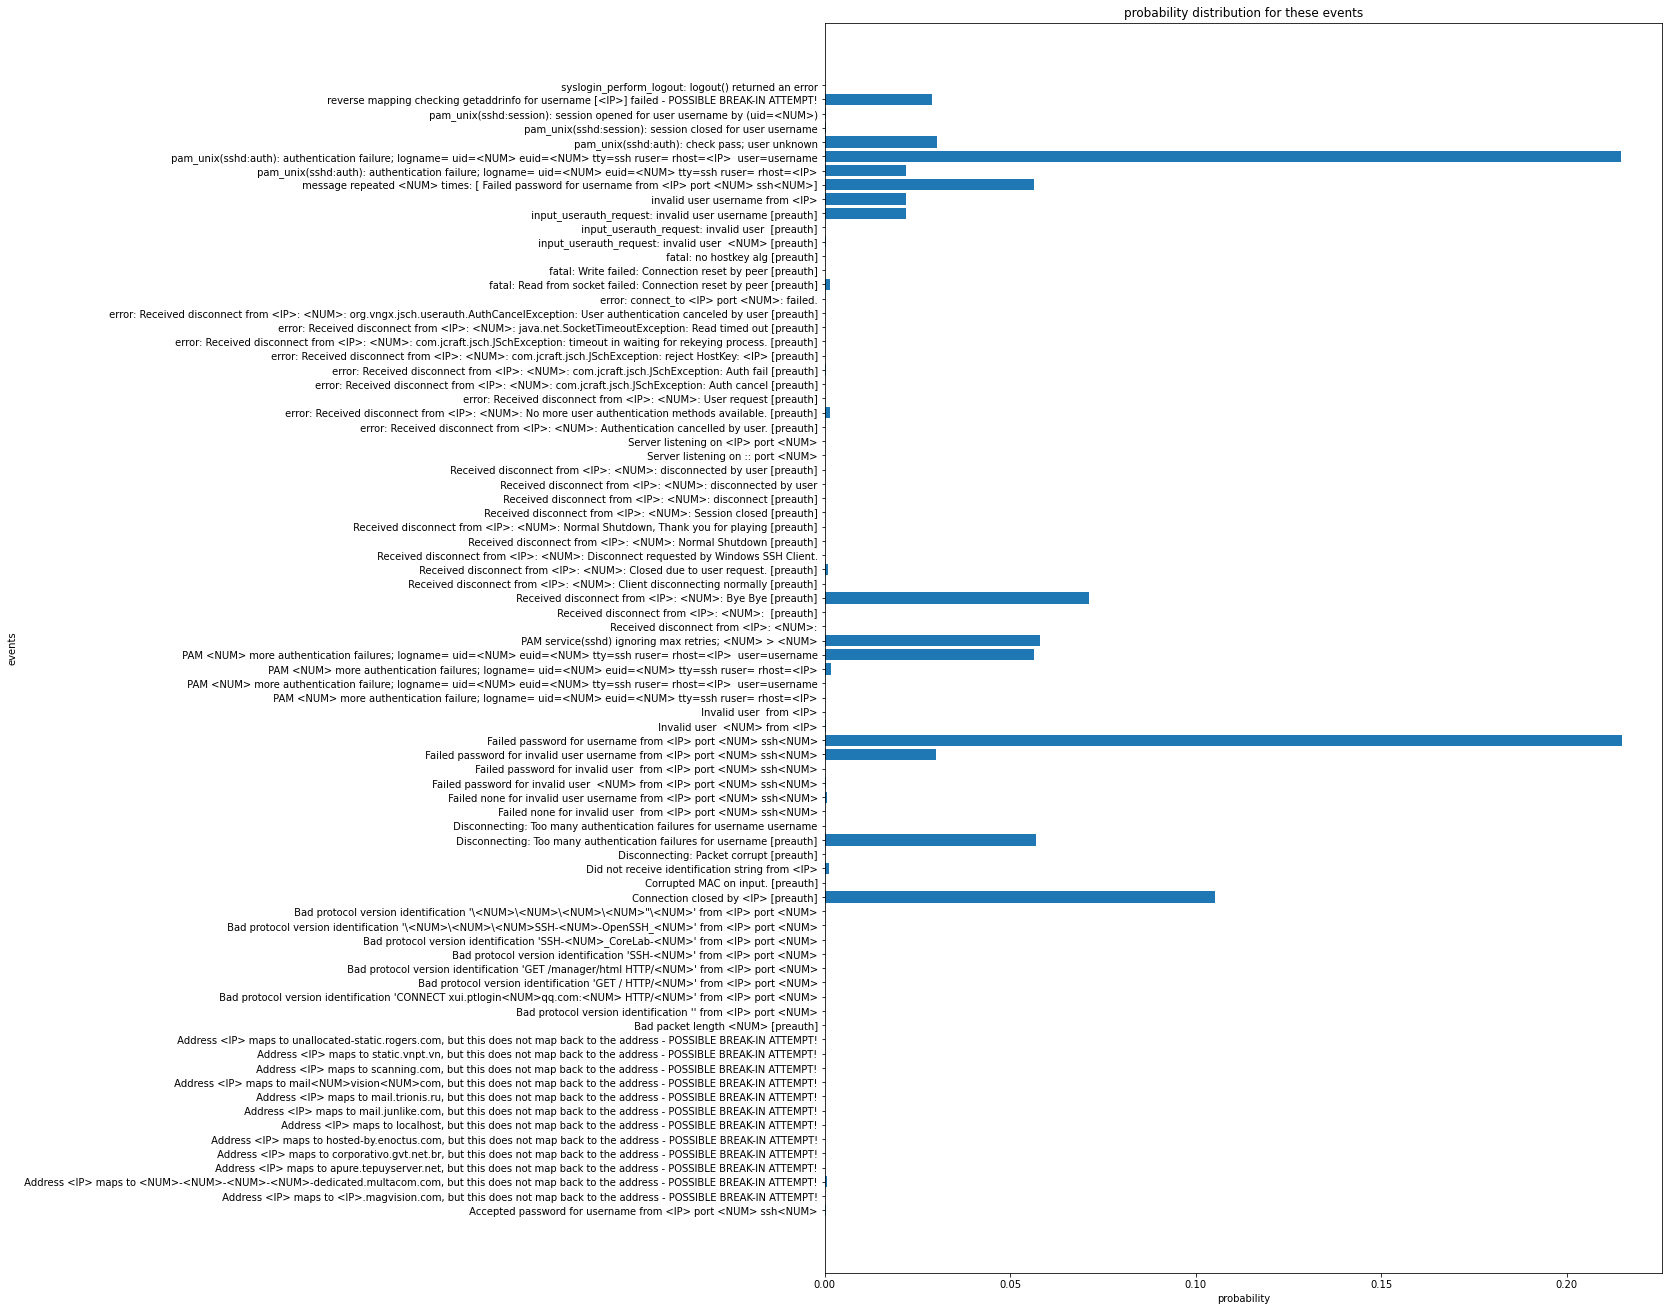

In [277]:
plt.figure(figsize=(15,23))
plt.barh(list(dist_dict.keys()), list(dist_dict.values()))
plt.xlabel('probability')
plt.ylabel('events')
plt.title('probability distribution for these events')
plt.show()

- The distribution of events is given above.

- As can be seen, the most likely events are all related to unsuccessful authentication, incorrect password entry, and many unsuccessful login attempts. We also have an event related to disconnection.

- Most high-probability events are due to unsuccessful authentication and incorrect password entry. This indicates a problem in this regard. The user interface may not be suitable for authentication. Users may have trouble in remembering the password. These many unsuccessful actions can also indicate a cyber attack to log in. For this issue, the timing of actions and the distance between them should be examined.

## Movement matrix between events

In [278]:
log.head()

,time,ssh_id,event
0,1.639119e+09,24200,reverse mapping checking getaddrinfo for user...
1,1.639119e+09,24200,invalid user username from <IP>
2,1.639119e+09,24200,input_userauth_request: invalid user username...
3,1.639119e+09,24200,pam_unix(sshd:auth): check pass; user unknown
4,1.639119e+09,24200,pam_unix(sshd:auth): authentication failure; ...


In [279]:
tgs2num = dict(zip(tgs,range(len(tgs))))

In [280]:
log_users = log.groupby('ssh_id')
users_keys = log_users.groups.keys()

res = [[0 for j in range(len(tgs))] for i in range(len(tgs))]
s = [0 for i in range(len(tgs))]
for key in users_keys:
  session_events = log_users.get_group(key).sort_values('time')['event'].tolist()
  for i in range(1,len(session_events)):
    first = tgs2num[session_events[i-1]]
    second = tgs2num[session_events[i]]
    res[first][second] += 1
    s[first] += 1

for i in range(len(res)):
  for j in range(len(res)):
    if res[i][j] == 0:
      continue
    res[i][j] /= s[i]
    res[i][j] *= 100

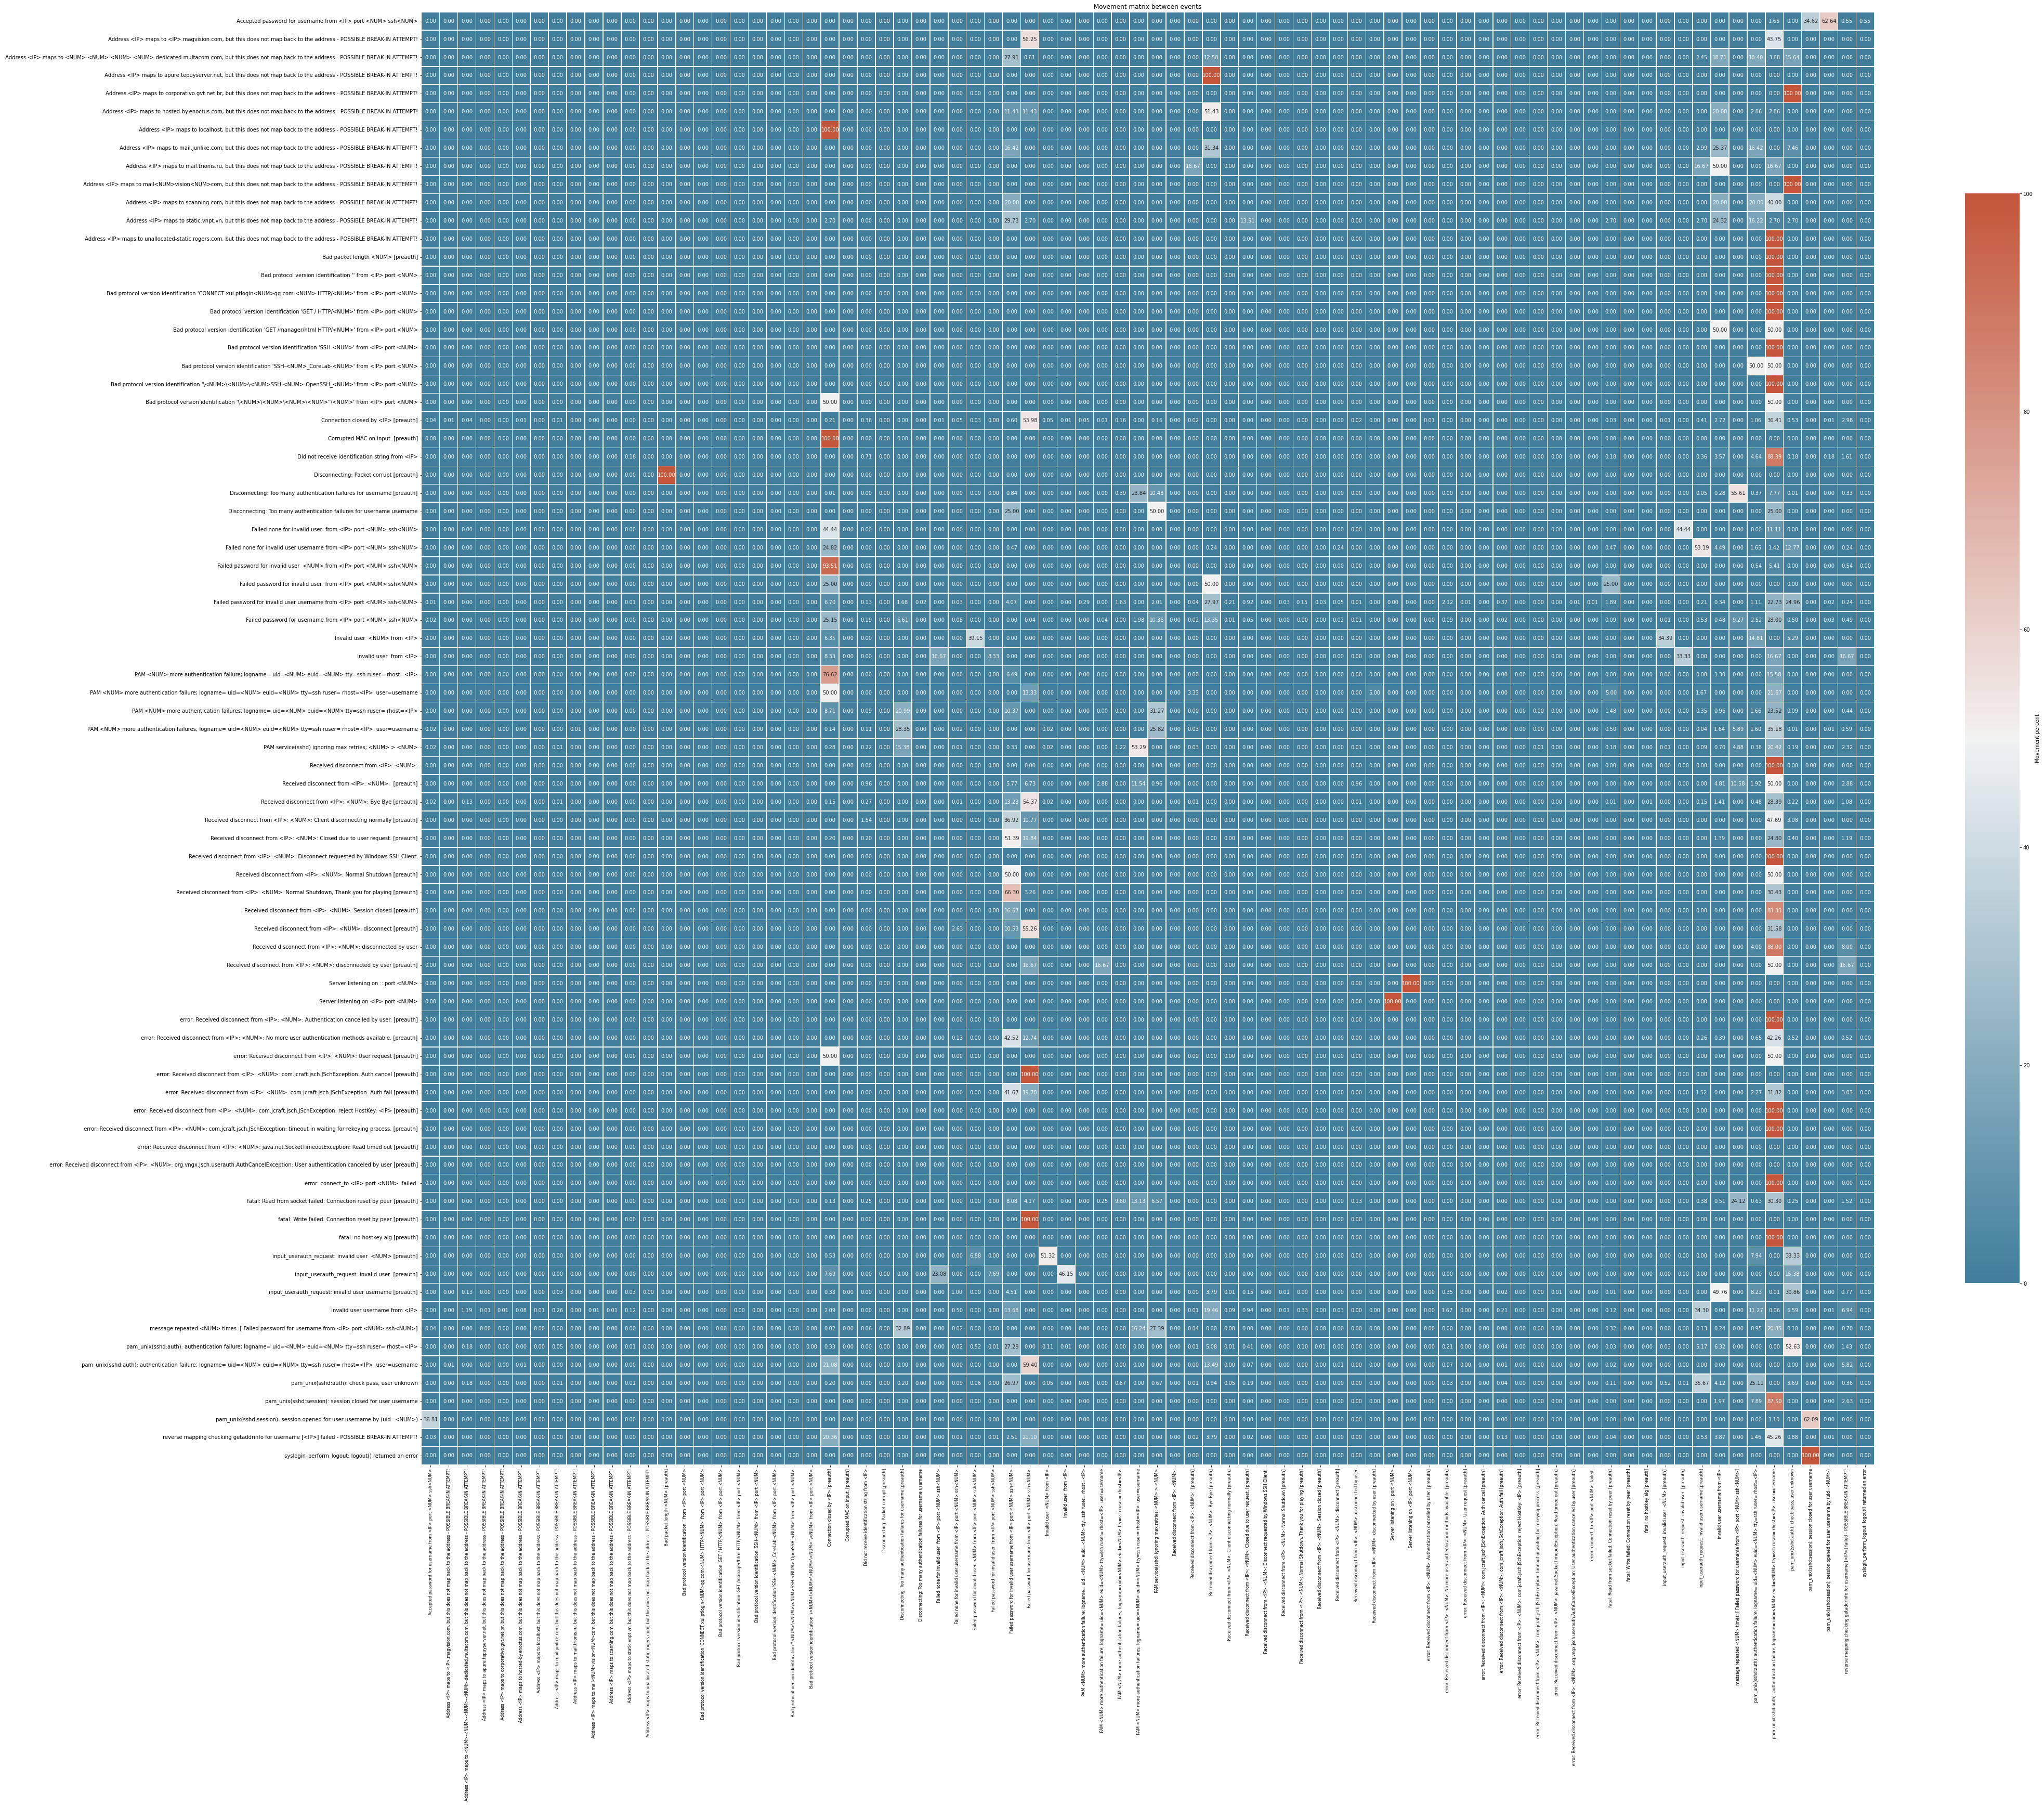

In [281]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

axis_labels = tgs

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(res, 
            # mask=mask, 
            cmap=cmap, 
            vmax= np.max(res), 
            vmin = np.min(res),
            center= (np.max(res)+np.min(res))/2,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.2f', 
            annot_kws={'size': 10},
            cbar_kws={"shrink": .75, 'label': 'Movement percent'},
            xticklabels=axis_labels, yticklabels=axis_labels)

plt.title('Movement matrix between events')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 8)
# ax.set_ylim(len(transfer_matrix)+1, -1)
# plt.savefig('corrTax.png', dpi = 600)

plt.show()

- To create this matrix, we sort the events in each session by time.
In this way, in each session, we have the events one after the other. Then for each of the two consecutive events in each session, we add the cell corresponding to these two events in the matrix to the number one. Finally, we divide all the numbers by the number of times the first cell event is seen in logs.

- Here the number of each cell indicates if a row event occurs. What is the probability that our second event is a column event. In some rows, we have a number close to 100 in white and red. That is, the second event occurs with relatively high certainty. Dark blue cells mean that the sequence of two events is very unlikely.

- For example, in the last row, if the log out encounters an error, the session closes after that. No other mode is possible. Here different sequences can be examined. The frequency of authentication errors is high.
It is more important for us to examine the sequences of these events.

- If the password is incorrect, the user is declared unauthorized and unidentified. In some cases the connection is lost. If the user was not authorized and the system checked the password, it is likely that the password was entered incorrectly and authentication was not performed. If the password was incorrect several times, the connection was closed due to a large number of unsuccessful authentications. If there was a problem with the authentication, it is likely that the next message will have a password error. This means that most of the problems in authentication were related to not having a password.

- Each column with more colors close to red and white means that in more pairs of events, this was the second event and was more likely. The first column of the table in this regard is related to the authentication error. Which can indicate a problem with the username and password. Subsequent columns are associated with password problems and connection closures. This shows that many times people have had difficulty in authentication.

- We have a lot of problems with authentication and password errors after various events. This makes a cyber attack more likely. The above authentication errors indicate an attempt to find a username and password. In these errors, trying to find a username is more likely.
Because after this type of error, the password error was more as a second event. That is, first an attempt is made to find an authorized username. The next step is to try to find the password.

- Authentication error can be related to trying to find a way to penetrate.

- Of course, other scenarios are possible. For example, many users forget their password or username. Even the user interface may not have been good for authentication.